# Parameter estimation

Initial commands

In [1]:
import sympy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('png', 'pdf') #setting figure format to vector when exported
plt.rcParams['font.family'] = 'Times New Roman'
plt.rcParams['text.usetex'] = True
from scipy.stats import norm
from scipy.stats import gumbel_r #A right-skewed Gumbel continuous random variable
from scipy.stats import lognorm
from sympy import symbols, exp, pi, log, diff, simplify, lambdify, evalf, sqrt
from sympy.solvers import solve
from sympy.solvers import linsolve
from sympy.solvers import nsolve
from sympy.solvers import nonlinsolve
from sympy.solvers import solveset

Reading data

In [2]:
data=pd.read_table("Y.dat",names=[0]) #reading using pandas
data=list(data.iloc[:,0]) #converting from pandas to list

## Normal distribution

Estimation of distribution parameters using method of moments

In [7]:
n=len(data) #sample size
X_=np.mean(data) #ubiased estimation of sample mean
SX_star_2=(1/(n-1))*sum(np.array([(Xi_-X_)**2 for Xi_ in data])) #unbiased estimation of sample variance
mX_est=X_
varX_est=SX_star_2

print('Estimation of sample mean for normal distribution using method of moments is: {:.3f}'.format(mX_est))
print('Estimation of sample variance for normal distribution using method of moments is: {:.3f}'.format(varX_est))

1.8928548635346234
Estimation of sample mean for normal distribution using method of moments is: 7.492
Estimation of sample variance for normal distribution using method of moments is: 1.893


Estimation of distribution parameters using maximum likelihood method

In [5]:
#Defining the likelihood function L
mX=symbols('mX',real=True)
sigmaX=symbols('sigmaX',real=True)
xi=symbols('xi',real=True)
n=symbols('n',real=True)

#PDF of normal distribution
#norm_funct=(1/(((2*pi)**(1/2))*sigmaX))*exp(-(1/2)*((xi-mX)/sigmaX)**2)

#L function to lnL function (product converts to summ)
summa=(data[0]-mX)**2 #the summ part in lnL function
for i in range(1,len(data)):
    summa=summa+(data[i]-mX)**2

#lnL function
    norm_funct_lnL=-n*log(sqrt(2*pi))-n*log(sigmaX)-(1/(2*sigmaX**2))*summa
print(simplify(norm_funct_lnL))

#differentiation of lnL along mX and sigmaX
norm_funct_lnL_dmX=diff(norm_funct_lnL,mX)
norm_funct_lnL_dsigmaX=diff(norm_funct_lnL,sigmaX)

res=solve((norm_funct_lnL_dmX,norm_funct_lnL_dsigmaX),mX,sigmaX)
print(res)

mX_est_MLE=res[[0][0]][0]
varX_est_MLE=abs(res[[0][0]][1].evalf(subs={n:len(data)}))**2

print('Estimation of sample mean for normal distribution using maximum likelihood method is: {:.3f}'.format(mX_est_MLE))
print('Estimation of sample variance for normal distribution using maximum likelihood method is: {:.3f}'.format(varX_est_MLE))

-50.0*mX**2/sigmaX**2 + 749.185918632253*mX/sigmaX**2 - 1.0*n*log(sigmaX) - 0.5*n*log(pi) - 0.5*n*log(2) - 2900.09401912923/sigmaX**2
[(7.49185918632255, -13.689142832549*sqrt(1/n)), (7.49185918632255, 13.689142832549*sqrt(1/n))]
Estimation of sample mean for normal distribution using maximum likelihood method is: 7.492
Estimation of sample variance for normal distribution using maximum likelihood method is: 1.874


Comparisson of histogram plot and PDF of normal distribution considering parameters obtained by method of moments (MM) and maximum likelihood method (MLE)

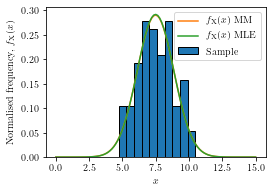

In [5]:
plt.figure(figsize=(10/2.54,7/2.54))
plt.hist(data,density=True,cumulative=False,edgecolor='black',align='mid',label='Sample')
xList=np.linspace(0.01,15,101,endpoint=True)
plt.plot(xList,norm.pdf(xList,loc=mX_est,scale=varX_est**0.5),label='$f_{\mathrm{X}}(x)$ MM')
plt.plot(xList,norm.pdf(xList,loc=mX_est_MLE,scale=float(varX_est_MLE**0.5)),label='$f_{\mathrm{X}}(x)$ MLE')
plt.xlabel('$x$')
plt.ylabel('Normalised frequency, $f_{\mathrm{X}}(x)$')
plt.legend()
plt.show()

## Log-normal distribution

Estimation of distribution parameters using method of moments

In [6]:
mX_est=X_
varX_est=SX_star_2
varX_est_lognorm=np.log((varX_est/mX_est**2)+1) #np.log is ln in Python numpy
mX_tilde_est=mX_est*np.exp(-0.5*varX_est_lognorm)  #mX_tilde_est_lognorm is estimated median of X

print('Estimation of sample median for log-normal distribution using method of moments is: {:.3f}'.format(mX_tilde_est))
print('Estimation of sample variance for log-normal distribution using method of moments is: {:.3f}'.format(varX_est_lognorm))

Estimation of sample median for log-normal distribution using method of moments is: 7.369
Estimation of sample variance for log-normal distribution using method of moments is: 0.033


Estimation of distribution parameters using maximum likelihood method

In [7]:
#Defining the likelihood function L
mX_tilde=symbols('mX_tilde',real=True)
sigmaX_lognorm=symbols('sigmaX_lognorm',real=True)
xi=symbols('xi',real=True)
n=symbols('n',real=True)

#PDF of log-normal distribution
#norm_funct=(1/(((2*pi)**(1/2))*sigmaX_lognorm))*exp(-(1/2)*((log(xi)-log(mX_tilde))/sigmaX_lognorm)**2)

#L function to lnL function (product converts to summ)
summa1=log(data[0]) #the first summ part in lnL function
for i in range(1,len(data)):
    summa1=summa1+log(data[i])
    
summa2=((log(data[0]))-log(mX_tilde))**2 #the second summ part in lnL function
for i in range(1,len(data)):
    summa2=summa2+(log(data[i])-log(mX_tilde))**2

#lnL function
norm_funct_lnL=-n*log(sqrt(2*pi))-summa1-n*log(sigmaX_lognorm)-(1/(2*sigmaX_lognorm**2))*summa2
norm_funct_lnL=norm_funct_lnL.subs(n,len(data))
print(simplify(norm_funct_lnL))

#differentiation of lnL along mX and sigmaX
norm_funct_lnL_dmX=diff(norm_funct_lnL,mX_tilde)
norm_funct_lnL_dsigmaX=diff(norm_funct_lnL,sigmaX_lognorm)
print(simplify(norm_funct_lnL_dmX))
print(simplify(norm_funct_lnL_dsigmaX))

res=nonlinsolve((norm_funct_lnL_dmX,norm_funct_lnL_dsigmaX),mX_tilde,sigmaX_lognorm)
print(res)

mX_tilde_est_MLE=list(res)[[0][0]][0]
varX_lognorm_est_MLE=abs(list(res)[[0][0]][1])**2

mX_est_MLE=mX_tilde_est_MLE*exp((1/2)*varX_lognorm_est_MLE)
varX_est_MLE=(mX_tilde_est_MLE**2)*(exp(varX_lognorm_est_MLE)-1)

print('Estimation of sample median for log-normal distribution using maximum likelihood method is: {:.3f}'.format(mX_tilde_est_MLE))
print('Estimation of sample mean for log-normal distribution using maximum likelihood method is: {:.3f}'.format(mX_est_MLE))
print('Estimation of sample variance for log- normal distribution using maximum likelihood method is: {:.3f}'.format(varX_lognorm_est_MLE))

-100.0*log(sigmaX_lognorm) - 199.640892268585 - 50.0*log(pi) - 50.0*log(2) - 50.0*log(mX_tilde)**2/sigmaX_lognorm**2 + 199.640892268585*log(mX_tilde)/sigmaX_lognorm**2 - 201.06971011692/sigmaX_lognorm**2
(199.640892268585 - 100.0*log(mX_tilde))/(mX_tilde*sigmaX_lognorm**2)
1.0*(-100.0*sigmaX_lognorm**2 + 100.0*log(mX_tilde)**2 - 399.281784537169*log(mX_tilde) + 402.13942023384)/sigmaX_lognorm**3
FiniteSet((7.36256901424964, -0.189065109839812), (7.36256901424964, 0.189065109839812))
Estimation of sample median for log-normal distribution using maximum likelihood method is: 7.363
Estimation of sample mean for log-normal distribution using maximum likelihood method is: 7.495
Estimation of sample variance for log- normal distribution using maximum likelihood method is: 0.036


Comparisson of histogram plot and PDF of log-normal distribution considering parameters obtained by method of moments (MM) and maximum likelihood method (MLE)

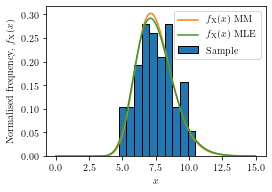

In [8]:
plt.figure(figsize=(10 /2.54,7/2.54))
plt.hist(data,density=True,cumulative=False,edgecolor='black',align='mid',label='Sample')
xList=np.linspace(0.01,15,101,endpoint=True)
yList=[(1/((2*np.pi)**0.5*varX_est_lognorm**0.5*xList[i]))*np.exp(-0.5*((np.log(xList[i])-np.log(mX_tilde_est))/(varX_est_lognorm**0.5))**2) for i in range(len(xList))] #PDF is defined here manually
yList2=[(1/((2*np.pi)**0.5*float(varX_lognorm_est_MLE)**0.5*xList[i]))*np.exp(-0.5*((np.log(xList[i])-np.log(float(mX_tilde_est_MLE)))/(float(varX_lognorm_est_MLE)**0.5))**2) for i in range(len(xList))] #PDF is defined here manually
plt.plot(xList,yList,label='$f_{\mathrm{X}}(x)$ MM')
plt.plot(xList,yList2,label='$f_{\mathrm{X}}(x)$ MLE')
plt.xlabel('$x$')
plt.ylabel('Normalised frequency, $f_{\mathrm{X}}(x)$')
plt.legend()
plt.show()

## Gumbel distribution of maximums

Estimation of distribution parameters using method of moments

In [9]:
mX_est=X_
varX_est=SX_star_2
alpha_est=np.pi/((6**0.5)*varX_est**0.5)
u_est=mX_est-(np.euler_gamma/alpha_est)

print('Estimation of parameter ''alpha'' for Gumbel distribution of maximums using method of moments is: {:.3f}'.format(alpha_est))
print('Estimation of parameter ''u'' for Gumbel distribution of maximums using method of moments is: {:.3f}'.format(u_est))

Estimation of parameter alpha for Gumbel distribution of maximums using method of moments is: 0.932
Estimation of parameter u for Gumbel distribution of maximums using method of moments is: 6.873


Estimation of distribution parameters using maximum likelihood method

In [10]:
#Defining the likelihood function L
alpha_=symbols('alpha_',real=True)
u_=symbols('u_',real=True)
xi=symbols('xi',real=True)
n=symbols('n',real=True)

#PDF of Gumbel distribution of maximumms
#Gumb_max_funct=alpha_*exp(-alpha_*(xi-u_)-exp(-alpha_*(xi-u)))

#L function to lnL function (product converts to summ)

summa1=data[0] #the first summ part in lnL function
for i in range(1,len(data)):
    summa1=summa1+data[i]

summa2=exp(-alpha_*(data[0]-u_)) #the second summ part in lnL function
for i in range(1,len(data)):
    summa2=summa2+exp(-alpha_*(data[i]-u_))

#lnL function
Gumb_max_funct_lnL=n*log(alpha_)-alpha_*summa1+n*alpha_*u_-summa2

Gumb_max_funct_lnL=Gumb_max_funct_lnL.subs(n,len(data))

#print(Gumb_max_funct_lnL)
#print(simplify(Gumb_max_funct_lnL))

#differentiation of lnL along alpha and u
Gumb_max_funct_lnL_dalpha=diff(Gumb_max_funct_lnL,alpha_)
Gumb_max_funct_lnL_du=diff(Gumb_max_funct_lnL,u_)

#print(Gumb_max_funct_lnL_dalpha)
#print(Gumb_max_funct_lnL_du)

res=nsolve((Gumb_max_funct_lnL_dalpha,Gumb_max_funct_lnL_du),(alpha_,u_),(1,7)) #1 and 7 are initial estimates
print(res)

alpha_est_MLE=np.float(res[0])
u_est_MLE=np.float(res[1])

print('Estimation of parameter ''alpha'' for Gumbel distribution of maximums using maximum likelihood method is: {:.3f}'.format(alpha_est_MLE))
print('Estimation of parameter ''u'' for Gumbel distribution of maximums using maximum likelihood method is: {:.3f}'.format(u_est_MLE))

Matrix([[0.770526005195869], [6.80815273177677]])
Estimation of parameter alpha for Gumbel distribution of maximums using maximum likelihood method is: 0.771
Estimation of parameter u for Gumbel distribution of maximums using maximum likelihood method is: 6.808


Comparisson of histogram plot and PDF of Gumbel distribution of maximums considering parameters obtained by method of moments (MM) and maximum likelihood method (MLE)

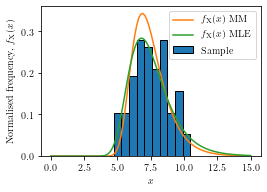

In [11]:
plt.figure(figsize=(10 /2.54,7/2.54))
plt.hist(data,density=True,cumulative=False,edgecolor='black',align='mid',label='Sample')
xList=np.linspace(0.01,15,101,endpoint=True)
yList=[alpha_est*np.exp(-alpha_est*(xList[i]-u_est)-np.exp(-alpha_est*(xList[i]-u_est))) for i in range(len(xList))] #PDF is defined here manually because Python only has built-in standard Gumbel PDF and 'loc' and 'mean' are not mX_est and varX_est but are derived from MLE 
yList2=[alpha_est_MLE*np.exp(-alpha_est_MLE*(xList[i]-u_est_MLE)-np.exp(-alpha_est_MLE*(xList[i]-u_est_MLE))) for i in range(len(xList))] #PDF is defined here manually because Python only has built-in standard Gumbel PDF and 'loc' and 'mean' are not mX_est and varX_est but are derived from MLE
plt.plot(xList,yList,label='$f_{\mathrm{X}}(x)$ MM') #PDF is defined here manually
plt.plot(xList,yList2,label='$f_{\mathrm{X}}(x)$ MLE') #PDF is defined here manually
#plt.xlim(0,5)
plt.xlabel('$x$')
plt.ylabel('Normalised frequency, $f_{\mathrm{X}}(x)$')
plt.legend()
plt.show()